<ipython-input-5-07eaf159a688>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_df = df.append(df1, sort=False)


Size of training set: 10683 records
Size of test set: 2671 records
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


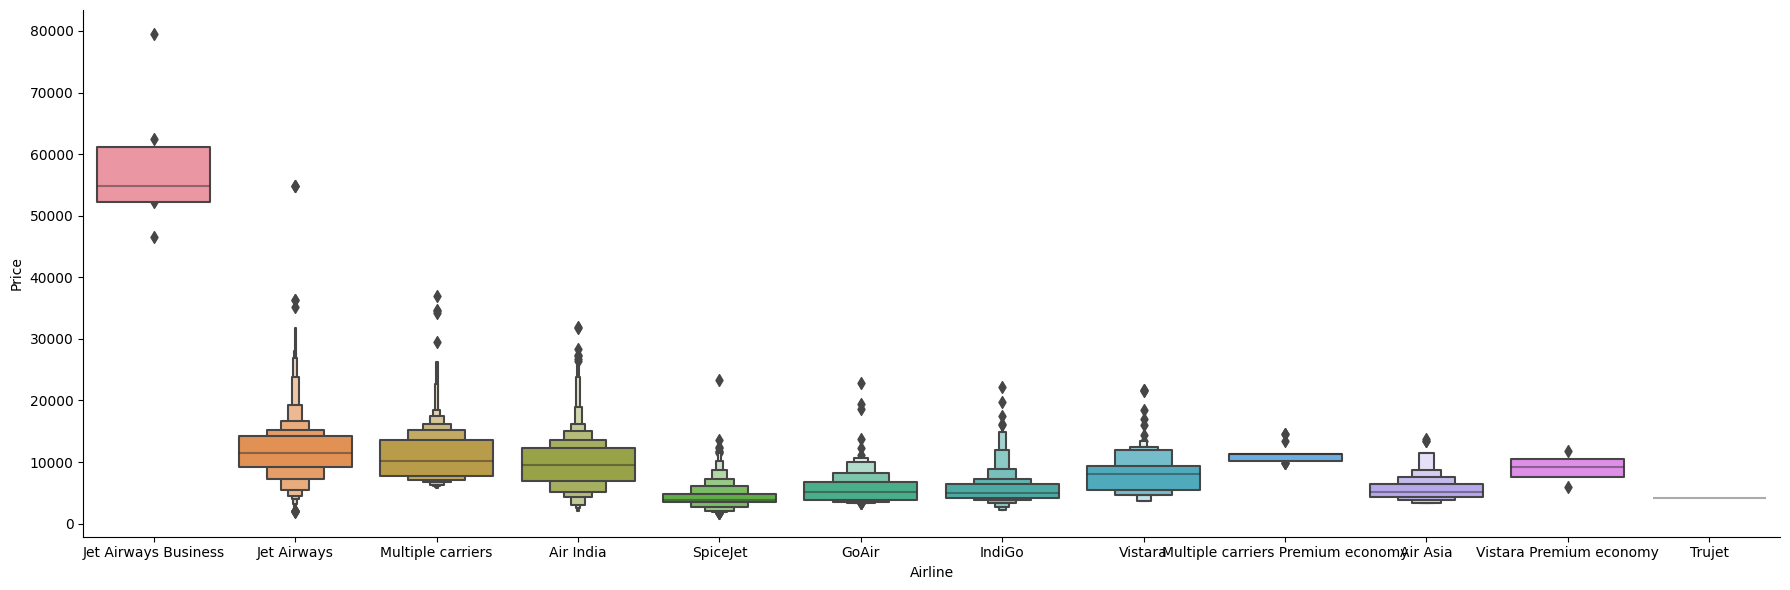

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


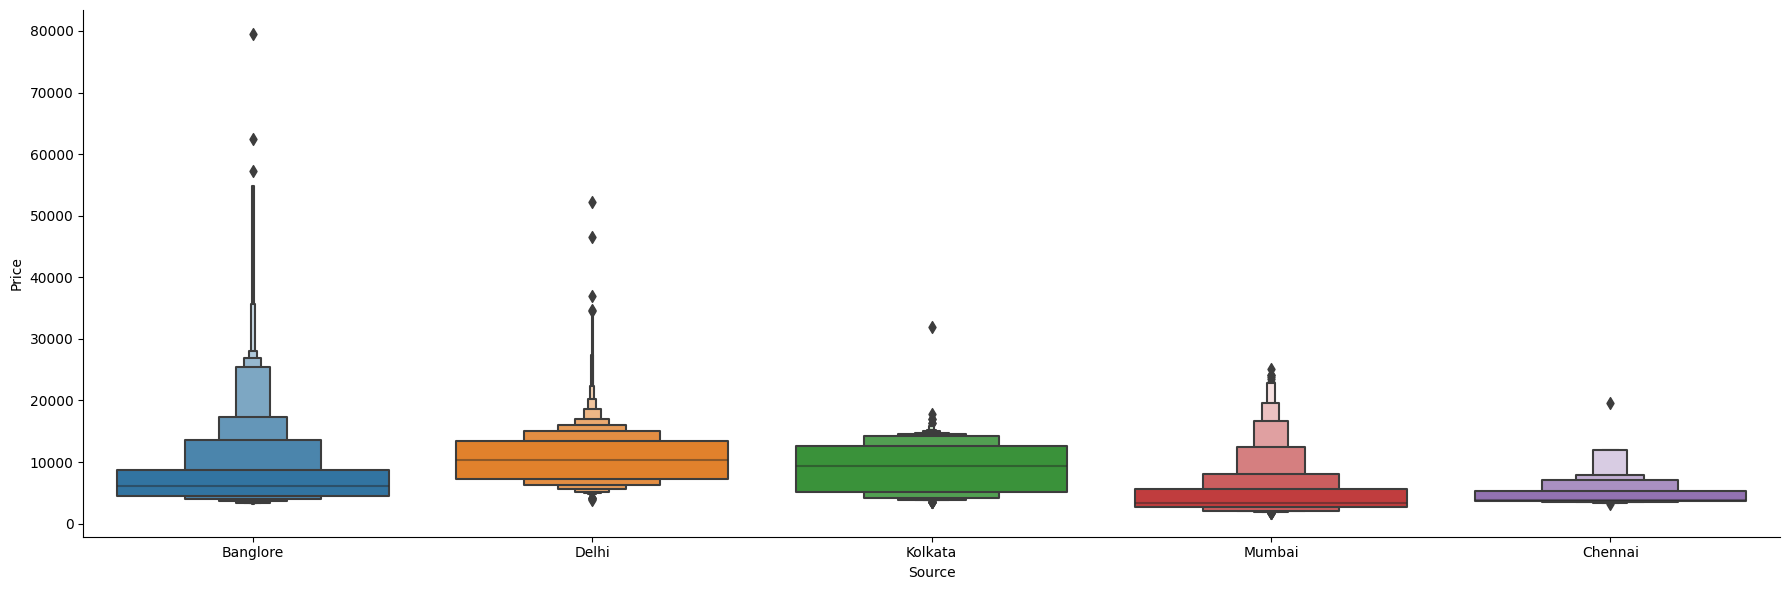

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


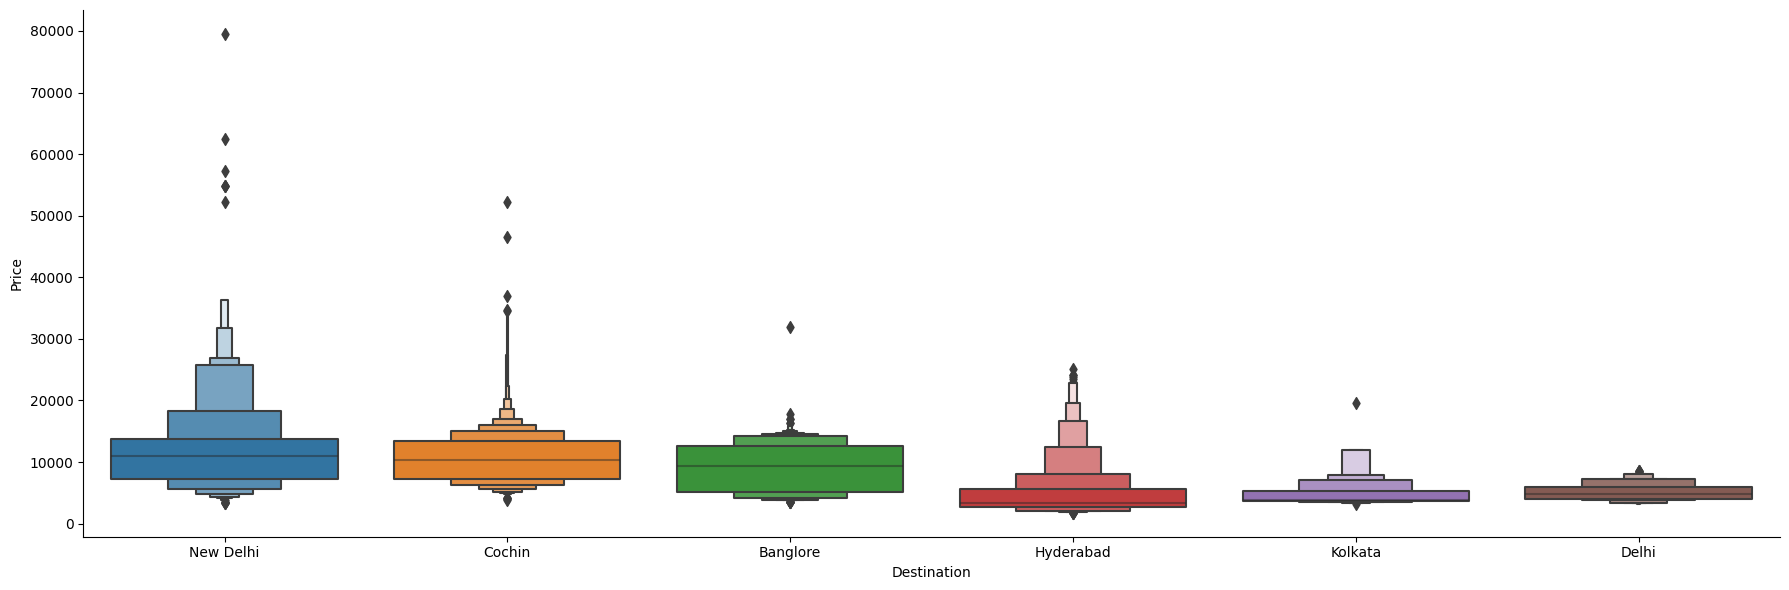

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64


In [5]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load the training dataset
df = pd.read_csv("/content/drive/MyDrive/IITB Project/3. Flight Fare Prediction/flight data.csv")

# Display the first few rows of the dataset
df.head()

# Display the shape of the dataset
df.shape

# Load the test dataset
df1 = pd.read_csv("/content/drive/MyDrive/IITB Project/3. Flight Fare Prediction/flight test.csv")

# Display the first few rows of the test dataset
df1.head()

# Display the shape of the test dataset
df1.shape

# Combine the training and test datasets into a single dataframe
total_df = df.append(df1, sort=False)

# Display the last few rows of the combined dataframe
total_df.tail()

# Display the first few rows of the combined dataframe
total_df.head()

# Display the shape of the combined dataframe
total_df.shape

# Print the size of the training set and test set
print("Size of training set:", df.shape[0], "records")
print("Size of test set:", df1.shape[0], "records")

# FEATURES:
# Airline: The name of the airline.
# Date_of_Journey: The date of the journey
# Source: The source from which the service begins.
# Destination: The destination where the service ends.
# Route: The route taken by the flight to reach the destination.
# Dep_Time: The time when the journey starts from the source.
# Arrival_Time: Time of arrival at the destination.
# Duration: Total duration of the flight.
# Total_Stops: Total stops between the source and destination.
# Additional_Info: Additional information about the flight
# Price: The price of the ticket
# We will be focusing on the Train data for analysis.

# Check the counts of each airline in the dataset
airline_counts = df['Airline'].value_counts()
print(airline_counts)

# Visualize the relation between airline and price using a boxen plot
sns.catplot(y='Price', x='Airline', data=df.sort_values('Price', ascending=False), kind="boxen", height=6, aspect=3)
plt.show()

# Check the counts of each source in the dataset
source_counts = df['Source'].value_counts()
print(source_counts)

# Visualize the relation between source and price using a boxen plot
sns.catplot(y='Price', x='Source', data=df.sort_values('Price', ascending=False), kind="boxen", height=6, aspect=3)
plt.show()

# Check the counts of each destination in the dataset
destination_counts = df['Destination'].value_counts()
print(destination_counts)

# Visualize the relation between destination and price using a boxen plot
sns.catplot(y='Price', x='Destination', data=df.sort_values('Price', ascending=False), kind="boxen", height=6, aspect=3)
plt.show()

# Check the counts of each flight duration in the dataset
duration_counts = df['Duration'].value_counts()
print(duration_counts)


In [6]:
# Feature Engineering

# Extracting the day, month, and year from the Date_of_Journey column
total_df['Date'] = total_df['Date_of_Journey'].str.split('/').str[0]
total_df['Month'] = total_df['Date_of_Journey'].str.split('/').str[1]
total_df['Year'] = total_df['Date_of_Journey'].str.split('/').str[2]

# Drop the original Date_of_Journey column
total_df = total_df.drop(['Date_of_Journey'], axis=1)

# Convert Date, Month, and Year columns to integer type
total_df['Date'] = total_df['Date'].astype(int)
total_df['Month'] = total_df['Month'].astype(int)
total_df['Year'] = total_df['Year'].astype(int)

# Check data types
total_df.dtypes

# Convert Arrival_Time to only date
total_df['Arrival_Time'] = total_df['Arrival_Time'].str.split(' ').str[0]

# Analyzing Total_Stops column
total_df['Total_Stops'] = total_df['Total_Stops'].fillna('1 stop')
total_df['Total_Stops'] = total_df['Total_Stops'].replace('non-stop', '0 stop')

# Extract the number of stops from the Total_Stops column
total_df['Stop'] = total_df['Total_Stops'].str.split(' ').str[0]

# Drop Total_Stops column and convert Stop to integer
total_df = total_df.drop(['Total_Stops'], axis=1)
total_df['Stop'] = total_df['Stop'].astype(int)

# Extract hours and minutes from Arrival_Time and Dep_Time columns
total_df['Arrival_Hour'] = total_df['Arrival_Time'].str.split(':').str[0]
total_df['Arrival_Minute'] = total_df['Arrival_Time'].str.split(':').str[1]
total_df['Departure_Hour'] = total_df['Dep_Time'].str.split(':').str[0]
total_df['Departure_Minute'] = total_df['Dep_Time'].str.split(':').str[1]

# Convert Arrival_Hour, Arrival_Minute, Departure_Hour, and Departure_Minute to integers
total_df['Arrival_Hour'] = total_df['Arrival_Hour'].astype(int)
total_df['Arrival_Minute'] = total_df['Arrival_Minute'].astype(int)
total_df['Departure_Hour'] = total_df['Departure_Hour'].astype(int)
total_df['Departure_Minute'] = total_df['Departure_Minute'].astype(int)

# Drop Arrival_Time and Dep_Time columns
total_df = total_df.drop(['Arrival_Time', 'Dep_Time'], axis=1)

# Split the Route column into separate columns
total_df['Route_1'] = total_df['Route'].str.split('→ ').str[0]
total_df['Route_2'] = total_df['Route'].str.split('→ ').str[1]
total_df['Route_3'] = total_df['Route'].str.split('→ ').str[2]
total_df['Route_4'] = total_df['Route'].str.split('→ ').str[3]
total_df['Route_5'] = total_df['Route'].str.split('→ ').str[4]

# Fill missing values in Route columns and drop the original Route column
total_df['Route_1'].fillna("None", inplace=True)
total_df['Route_2'].fillna("None", inplace=True)
total_df['Route_3'].fillna("None", inplace=True)
total_df['Route_4'].fillna("None", inplace=True)
total_df['Route_5'].fillna("None", inplace=True)
total_df = total_df.drop(['Route'], axis=1)

# Drop Duration column
total_df = total_df.drop(['Duration'], axis=1)

# Fill missing values in Price column with mean
total_df['Price'].fillna((total_df['Price'].mean()), inplace=True)

# Use Label Encoder to convert categorical variables to numeric
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
total_df["Airline"] = le.fit_transform(total_df['Airline'])
total_df["Source"] = le.fit_transform(total_df['Source'])
total_df["Destination"] = le.fit_transform(total_df['Destination'])
total_df["Additional_Info"] = le.fit_transform(total_df['Additional_Info'])
total_df["Route_1"] = le.fit_transform(total_df['Route_1'])
total_df["Route_2"] = le.fit_transform(total_df['Route_2'])
total_df["Route_3"] = le.fit_transform(total_df['Route_3'])
total_df["Route_4"] = le.fit_transform(total_df['Route_4'])
total_df["Route_5"] = le.fit_transform(total_df['Route_5'])

# Drop the Year column
total_df = total_df.drop(['Year'], axis=1)

total_df.head()


,Airline,Source,Destination,Additional_Info,Price,Date,Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,1,21,35,16,50,0,34,8,12,4


Selected Features: Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Stop', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour',
       'Departure_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')


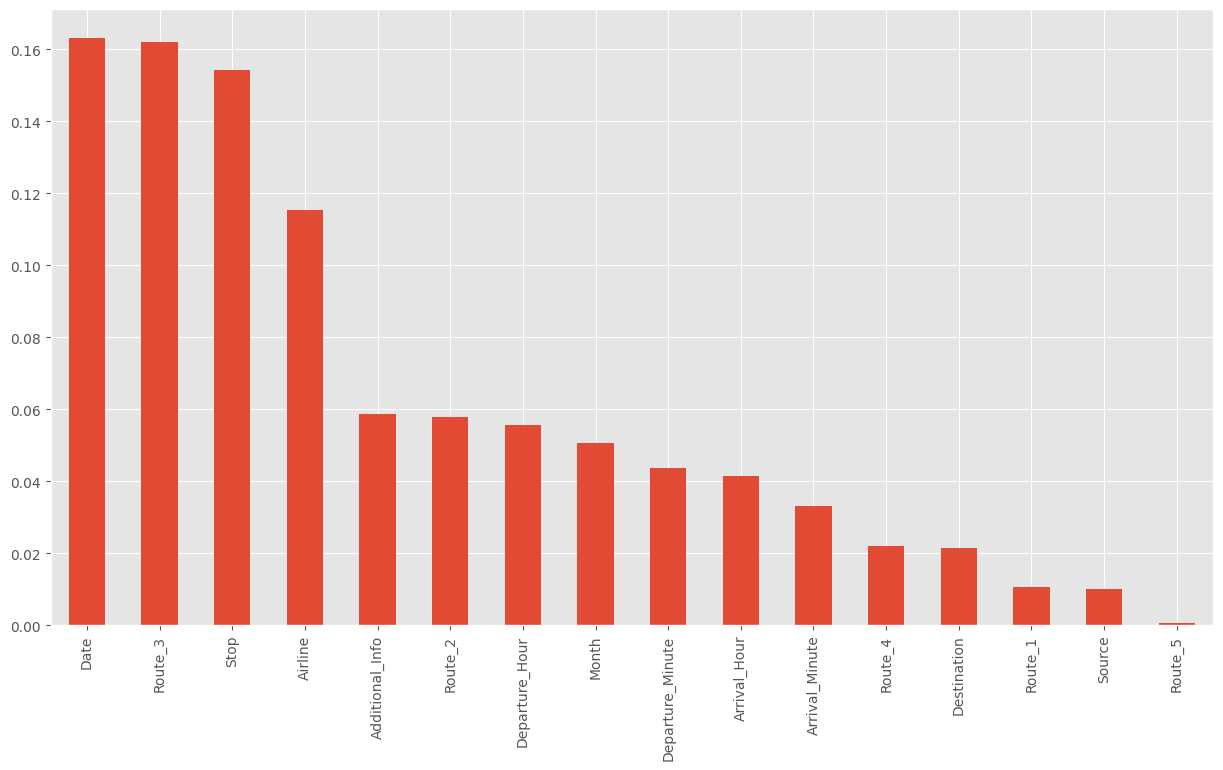

<ipython-input-9-fd3631f2b9ef>:49: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


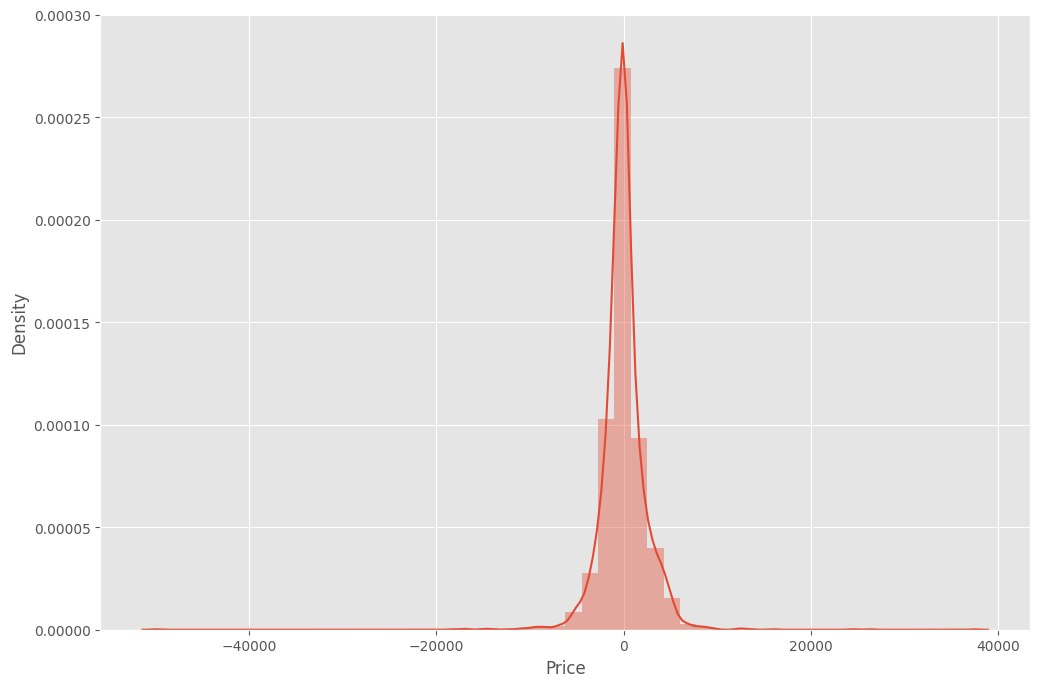

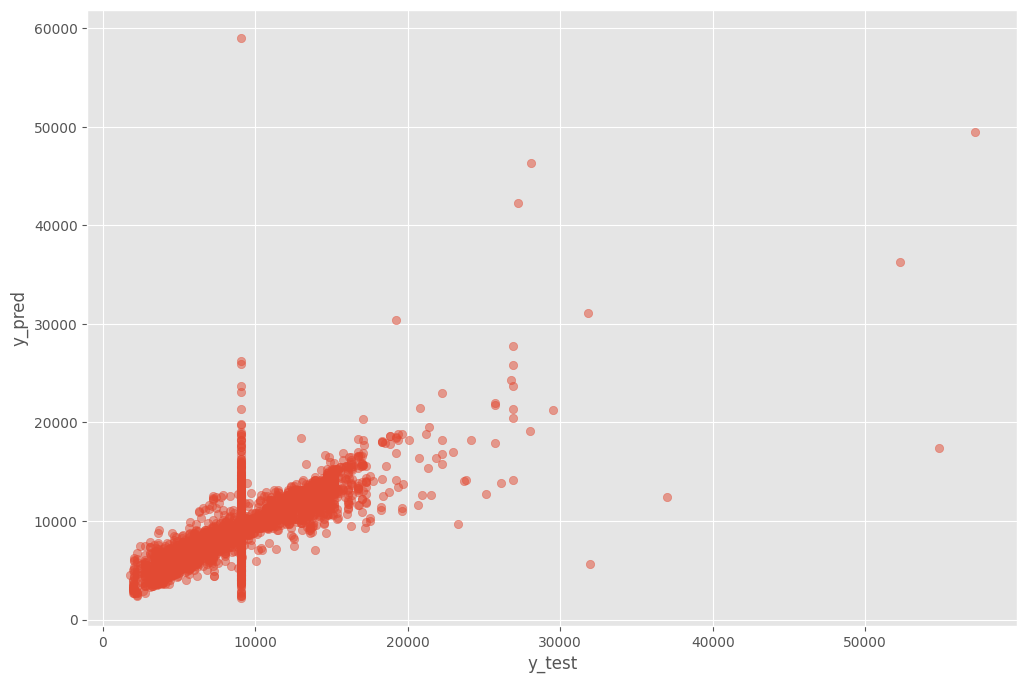

MAE: 1528.1236711062995
MSE: 6329146.540831286
RMSE: 2515.779509581729
Fitting 5 folds for each of 50 candidates, totalling 250 fits


<ipython-input-9-fd3631f2b9ef>:122: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - ypred1)


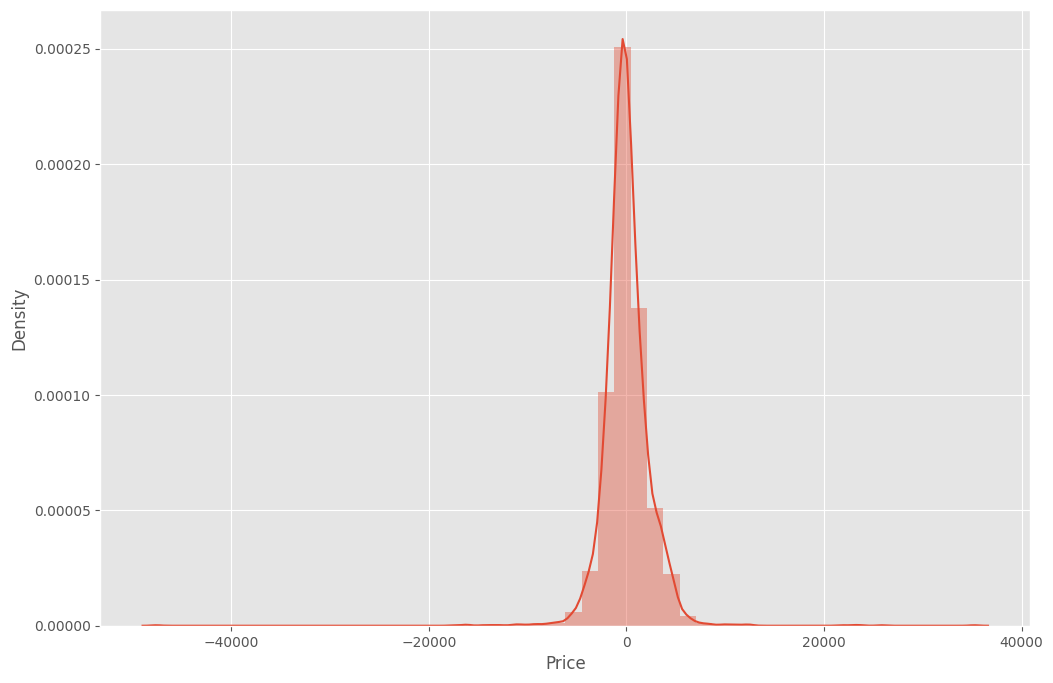

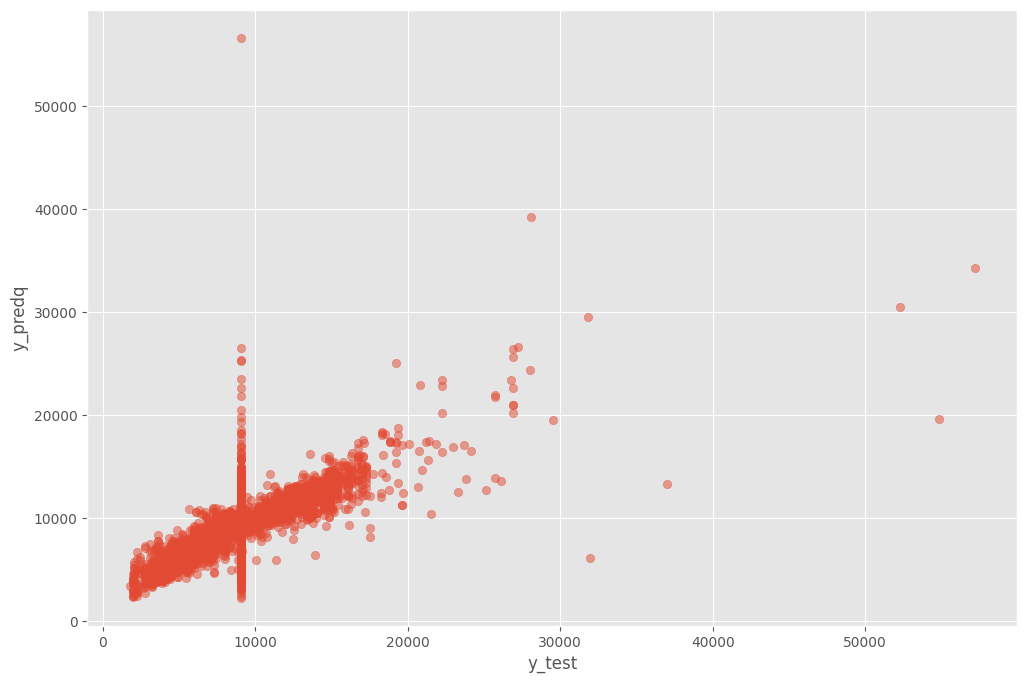

MAE: 1555.1238027359846
MSE: 6062319.777084315
RMSE: 2462.1778524477704
R-squared: 0.63536664897867


0.63536664897867

In [9]:
## Feature Selection

# Splitting the data into features (x) and target (y)
x = total_df.drop(['Price'], axis=1)
y = total_df['Price']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Feature selection using Lasso regression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
model.fit(x_train, y_train)

# Getting the selected features
selected_features = x_train.columns[(model.get_support())]

# Displaying the selected features
print("Selected Features:", selected_features)

# Feature importance using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)

plt.style.use("ggplot")
plt.figure(figsize=(15, 8))
feature_importances = pd.Series(etr.feature_importances_, index=x.columns)
feature_importances.nlargest(35).plot(kind='bar')
plt.show()

# Importing the RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

# Predicting on the test set
y_pred = reg_rf.predict(x_test)

# Model evaluation
reg_rf.score(x_train, y_train)
reg_rf.score(x_test, y_test)

plt.style.use("ggplot")
plt.figure(figsize=(12, 8))
sns.distplot(y_test - y_pred)
plt.show()

plt.figure(figsize=(12, 8))
plt.style.use("ggplot")
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

metrics.r2_score(y_test, y_pred)

### Hypertuning our Model

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 15)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 7, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3, 5,8, 10]

# Define hyperparameter grid
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

# Create a RandomizedSearchCV object
rf_random = RandomizedSearchCV(
    estimator=reg_rf, param_distributions=param_grid,
    scoring='neg_mean_squared_error', n_iter=50, cv=5,
    verbose=2, random_state=42, n_jobs=3
)

# Fit RandomizedSearchCV on the training data
rf_random.fit(x_train, y_train)

# Get the best hyperparameters from the search
best_params = rf_random.best_params_

# Create a RandomForestRegressor with the best hyperparameters
reg_rf = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    max_depth=best_params['max_depth']
)

# Fit the model with tuned hyperparameters
reg_rf.fit(x_train, y_train)

# Predict on the test set using the tuned model
ypred1 = reg_rf.predict(x_test)

# Visualize the prediction
plt.style.use("ggplot")
plt.figure(figsize=(12, 8))
sns.displot(y_test - ypred1)
plt.show()

plt.figure(figsize=(12, 8))
plt.style.use("ggplot")
plt.scatter(y_test, ypred1, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_predq")
plt.show()

# Model evaluation with tuned hyperparameters
print('MAE:', metrics.mean_absolute_error(y_test, ypred1))
print('MSE:', metrics.mean_squared_error(y_test, ypred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred1)))
print('R-squared:', metrics.r2_score(y_test, ypred1))

metrics.r2_score(y_test, ypred1)